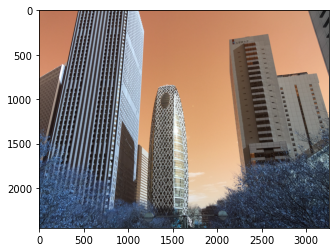

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = cv2.imread('shinjuku.jpg')

plt.imshow(img_orig)
plt.show()

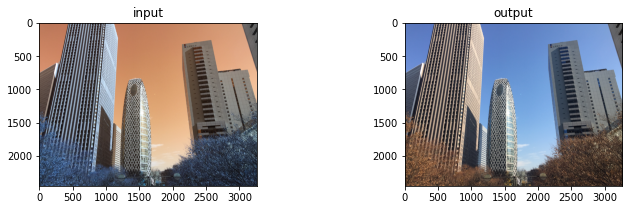

In [34]:
def RGB2BGR(img):
    return img[...,::-1]

img_bgr = RGB2BGR(img_orig)

#画像サイズ設定
plt.figure(figsize=(12,3))
#1列2行　の1枚目
plt.subplot(1,2,1)
plt.title('input')
plt.imshow(img_orig)

plt.subplot(1,2,2)
plt.title('output')
plt.imshow(img_bgr)

グレースケール

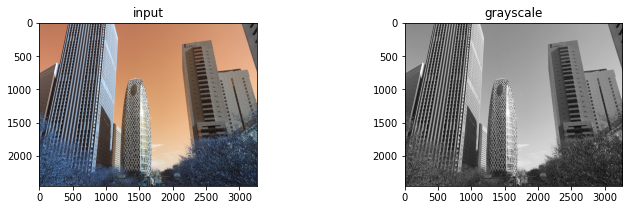

In [35]:
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
plt.title('input')
plt.imshow(img_orig)

plt.subplot(1,2,2)
plt.title('grayscale')
plt.imshow(img_gray, cmap='gray')

In [36]:
type(img_orig.copy())

numpy.ndarray

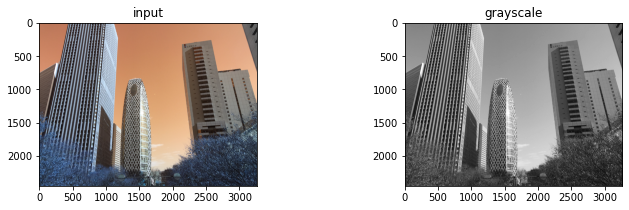

In [37]:
def RGB2GRAY(img):
    #uint8 -> float32
    _img = img.copy().astype(np.float32)
    gray = _img[...,0]*0.2126+_img[...,1]*0.7152+_img[...,2]*0.0722
    gray = np.clip(gray,0,255)
    return gray.astype(np.uint8)

img_gray = RGB2GRAY(img_orig)
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
plt.title('input')
plt.imshow(img_orig)

plt.subplot(1,2,2)
plt.title('grayscale')
plt.imshow(img_gray, cmap='gray')
plt.show()

二値化

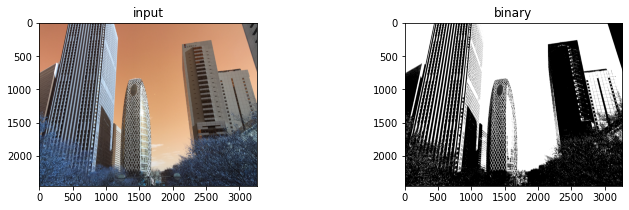

In [38]:
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
th, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
plt.title('input')
plt.imshow(img_orig)

plt.subplot(1,2,2)
plt.title('binary')
plt.imshow(img_bin, cmap='gray')
plt.show()

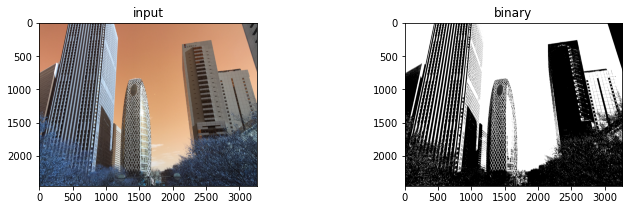

In [43]:
def binary(img, th):
    _img = img.copy()
    _img = np.minimum(_img//th,1)*255
    return _img.astype(np.uint8)

img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
img_bin1 = binary(img_gray, 127)

plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
plt.title('input')
plt.imshow(img_orig)

plt.subplot(1,2,2)
plt.title('binary')
plt.imshow(img_bin1, cmap='gray')
plt.show()

大津の二値化

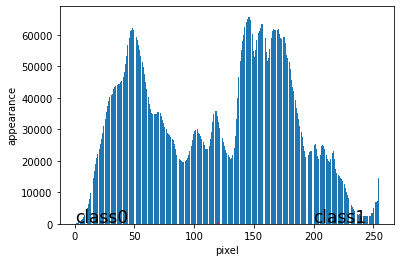

In [40]:
plt.hist(img_gray.ravel(), bins=255, rwidth=0.8, range=(0,255))
plt.text(0,500,'class0',fontsize=17)
plt.text(200,500,'class1',fontsize=17)
plt.vlines(120,0,700,color='red', linestyles='dotted')
plt.xlabel('pixel')
plt.ylabel('appearance')
plt.show()

threshold >> 112.0


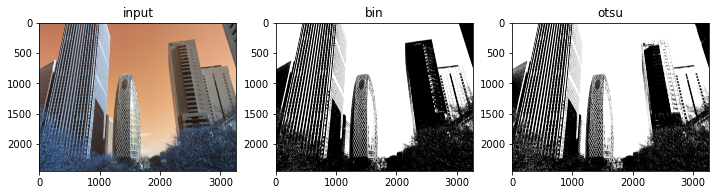

In [44]:
th, img_bin = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('threshold >>', th)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.title('bin')
plt.imshow(img_bin1, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('otsu')
plt.imshow(img_bin, cmap='gray')
plt.show()

大津の二値化では閾値を探す

threshold >> 112


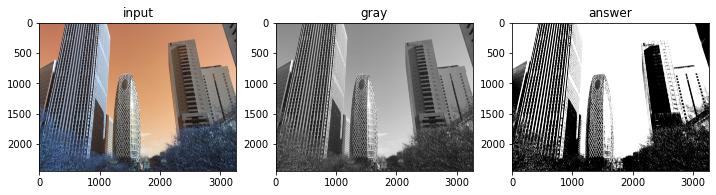

In [45]:
def otsu_thresh(img):
    max_vari = -1
    max_th = 0
    for th in range(1, 254):
        m0 = img[img <= th].mean() # mean class 0
        m1 = img[img > th].mean() # mean class 1
        w0 = img[img <= th].size # pixel num class 0
        w1 = img[img > th].size # pixel num class 1
        vari = w0 * w1 / ((w0 + w1) ** 2) * ((m0 - m1) ** 2) # inter class variance
        if vari > max_vari:
            max_th = th
            max_vari = vari
            
    img = binary(img, max_th)
            
    return max_th, img

    
th, img_bin = otsu_thresh(img_gray)
print('threshold >>', th)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('answer')
plt.imshow(img_bin, cmap='gray')
plt.show()

HSV変換(色相Hの180度変換)

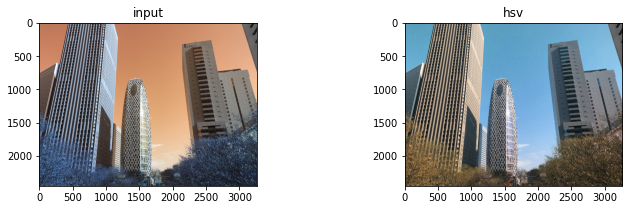

In [49]:
hsv = cv2.cvtColor(img_orig, cv2.COLOR_RGB2HSV)
hsv[...,0] = (hsv[...,0]+90)%180
img_hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
plt.title('input')
plt.imshow(img_orig)

plt.subplot(1,2,2)
plt.title('hsv')
plt.imshow(img_hsv)
plt.show()


HSV変換においてH,S,Vを可視化

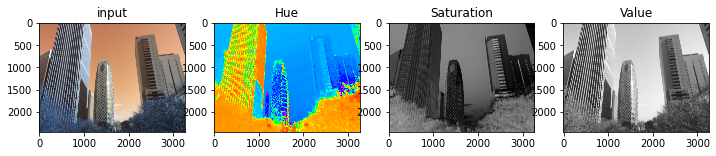

In [51]:
plt.figure(figsize=(12,3))
plt.subplot(1,4,1)
plt.title('input')
plt.imshow(img_orig)

plt.subplot(1,4,2)
plt.title('Hue')
plt.imshow(hsv[...,0]/360, cmap='hsv')

plt.subplot(1,4,3)
plt.title('Saturation')
plt.imshow(hsv[...,1], cmap='gray')

plt.subplot(1,4,4)
plt.title('Value')
plt.imshow(hsv[...,2], cmap='gray')

plt.show()

減色

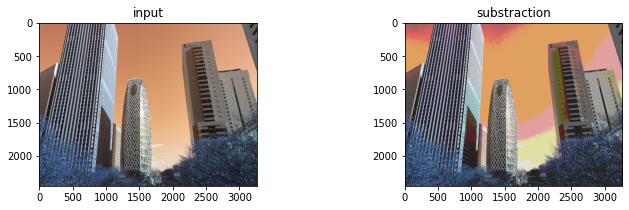

In [54]:
def color_substraction(img, div=4):
    th = 256 // div
    return np.clip(img//th*th+th//2,0,255)

img_sub = color_substraction(img_orig, div=4)

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1,2,2)
plt.title('substraction')
plt.imshow(img_sub)
plt.show()

平均プーリング

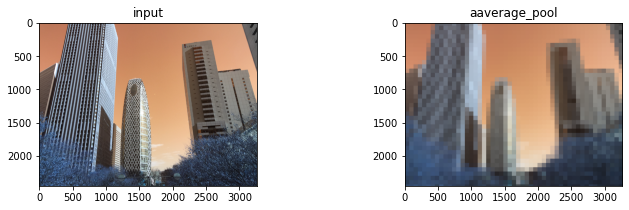

In [60]:
def pool_average(img, ksize_h=64, ksize_w=64):
    _img = img.copy().astype(np.float32)
    
    h,w = img.shape[:2]
    outer_h = h % ksize_h
    pad_top = outer_h // 2
    pad_bottom = outer_h - pad_top
    
    outer_w = w % ksize_w
    pad_left = outer_w // 2
    pad_right = outer_w - pad_left
    
    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0,0)], 'edge')
    out = np.zeros_like(_img)
    
    new_h, new_w = out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]
    
    # filtering
    for iy in range(0, new_h, ksize_h):
        for ix in range(0, new_w, ksize_w):
            for ic in range(c):
                out[iy : iy + ksize_h, ix : ix + ksize_w, ic] = _img[iy : iy + ksize_h, ix : ix + ksize_w, ic].mean()
            
    out = out[pad_top : pad_top + h, pad_left : pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

img_pool = pool_average(img_orig) # pooling

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('aaverage_pool')
plt.imshow(img_pool)
plt.show()

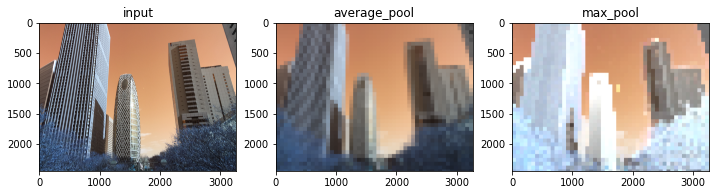

In [63]:
def pool_max(img, ksize_h=64, ksize_w=64):
    _img = img.copy().astype(np.float32)
    
    # padding
    h, w = img.shape[:2]
    outer_h = h % ksize_h
    pad_top = outer_h // 2
    pad_bottom = outer_h - pad_top
    outer_w = w % ksize_w
    pad_left = outer_w // 2
    pad_right = outer_w - pad_left
    
    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    #print(_img)
    out = np.zeros_like(_img)
    
    new_h, new_w = out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]
    
    # filtering
    for iy in range(0, new_h, ksize_h):
        for ix in range(0, new_w, ksize_w):
            for ic in range(c):
                out[iy : iy + ksize_h, ix : ix + ksize_w, ic] = _img[iy : iy + ksize_h, ix : ix + ksize_w, ic].max()
            
    out = out[pad_top : pad_top + h, pad_left : pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

img_pool_max = pool_max(img_orig) # pooling

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_orig)

plt.subplot(1, 3, 2)
plt.title('average_pool')
plt.imshow(img_pool)

plt.subplot(1, 3, 3)
plt.title('max_pool')
plt.imshow(img_pool_max)
plt.show()

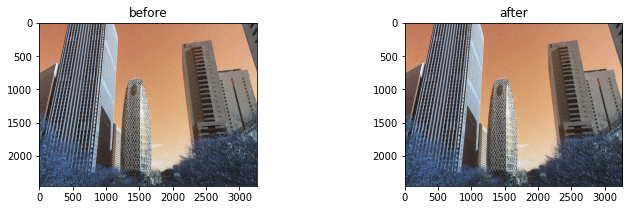

In [65]:
img_noise = cv2.imread('sinjuku_noise.jpg')

img_gau = cv2.GaussianBlur(img_noise,(3,3), 3)
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
plt.title('before')
plt.imshow(img_noise)

plt.subplot(1,2,2)
plt.title('after')
plt.imshow(img_gau)

plt.show()

In [76]:
import math
pi()


NameError: name 'pi' is not defined

0